# Chip Sales Data Analysis

In [1]:
import pandas as pd 
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns 
import openpyxl
import warnings

%matplotlib inline
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv(r'D:/Data Science Project/Virtual Internship/Data Analytics Virtual Internship at Quantium/QVI_purchase_behaviour.csv')
df2 = pd.read_excel(r'D:/Data Science Project/Virtual Internship/Data Analytics Virtual Internship at Quantium/QVI_transaction_data.xlsx', sheet_name='in')

In [3]:
purchase = df1.copy()
transaction = df2.copy()

## Data Checks 

In [4]:
df1.sample(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
5300,19288,RETIREES,Mainstream
46653,174312,MIDAGE SINGLES/COUPLES,Mainstream
3857,14477,RETIREES,Mainstream
6568,23230,OLDER SINGLES/COUPLES,Premium
63994,240042,YOUNG SINGLES/COUPLES,Mainstream
51171,191098,YOUNG FAMILIES,Premium
33926,124350,OLDER SINGLES/COUPLES,Budget
52128,196040,OLDER FAMILIES,Mainstream
64268,241013,OLDER FAMILIES,Mainstream
17575,64287,YOUNG SINGLES/COUPLES,Mainstream


In [5]:
df2.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
109812,43317,152,152066,150645,91,CCs Tasty Cheese 175g,2,4.2
46697,43364,163,163052,163330,46,Kettle Original 175g,2,10.8
210909,43471,143,143318,143796,78,Thins Chips Salt & Vinegar 175g,2,6.6
74308,43290,107,107067,108707,67,RRD Chilli& Coconut 150g,2,5.4
9390,43353,93,93121,91401,61,Smiths Crinkle Cut Chips Chicken 170g,2,5.8
202382,43554,239,239362,243982,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2
24086,43436,235,235246,238269,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6
38474,43308,71,71155,69931,85,RRD Honey Soy Chicken 165g,2,6.0
215212,43556,231,231107,234130,24,Grain Waves Sweet Chilli 210g,2,7.2
177683,43462,113,113050,115697,12,Natural Chip Co Tmato Hrb&Spce 175g,2,6.0


In [6]:
def quality_check_data(data):
    display(data.info())
    display(data.describe())
    display(f'Number Of Missing Values : {data.isnull().sum().sum()} Rows')
    display(f'Number Of Duplicated Values : {data.duplicated().sum()} Rows')
    display(f'Number Of Object Data Type : {len(data.select_dtypes(include="object").columns)} Features')
    display(f'Number Of Integer Data Type : {len(data.select_dtypes(include="int64").columns)} Features')
    display(f'Number Of Float Data Type : {len(data.select_dtypes(include="float64").columns)} Features')

In [7]:
quality_check_data(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


'Number Of Missing Values : 0 Rows'

'Number Of Duplicated Values : 0 Rows'

'Number Of Object Data Type : 2 Features'

'Number Of Integer Data Type : 1 Features'

'Number Of Float Data Type : 0 Features'

In [8]:
quality_check_data(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


None

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


'Number Of Missing Values : 0 Rows'

'Number Of Duplicated Values : 1 Rows'

'Number Of Object Data Type : 1 Features'

'Number Of Integer Data Type : 6 Features'

'Number Of Float Data Type : 1 Features'

In [9]:
def detect_outliers(data):
    for i in data.columns:
  # Check if the data type of the column is int64 or float64
      if((data[i].dtype == 'int64') | (data[i].dtype == 'float64')):
        q25 = percentile(data[i], 25) 
        q75 = percentile(data[i], 75)
        iqr = q75 - q25
        cutoff = 1.5 * iqr
        lower = q25 - cutoff
        upper = q75 + cutoff
        print(i)
        print(f'The Lower Limit is : {lower}, The Upper Limit is : {upper}')
        print('The Number of Above Upper Limits :' ,len(data[data[i] > upper]))
        print('The Number of Below Lower Limits :' ,len(data[data[i] < lower]))

In [10]:
detect_outliers(df1)

LYLTY_CARD_NBR
The Lower Limit is : -139557.5, The Upper Limit is : 409134.5
The Number of Above Upper Limits : 34
The Number of Below Lower Limits : 0


In [11]:
detect_outliers(df2)

DATE
The Lower Limit is : 43100.0, The Upper Limit is : 43828.0
The Number of Above Upper Limits : 0
The Number of Below Lower Limits : 0
STORE_NBR
The Lower Limit is : -129.5, The Upper Limit is : 402.5
The Number of Above Upper Limits : 0
The Number of Below Lower Limits : 0
LYLTY_CARD_NBR
The Lower Limit is : -129588.875, The Upper Limit is : 402704.125
The Number of Above Upper Limits : 44
The Number of Below Lower Limits : 0
TXN_ID
The Lower Limit is : -135048.125, The Upper Limit is : 405350.875
The Number of Above Upper Limits : 1
The Number of Below Lower Limits : 0
PROD_NBR
The Lower Limit is : -57.5, The Upper Limit is : 170.5
The Number of Above Upper Limits : 0
The Number of Below Lower Limits : 0
PROD_QTY
The Lower Limit is : 2.0, The Upper Limit is : 2.0
The Number of Above Upper Limits : 1279
The Number of Below Lower Limits : 27518
TOT_SALES
The Lower Limit is : -0.29999999999999805, The Upper Limit is : 14.899999999999999
The Number of Above Upper Limits : 578
The Numb

**Data Check Results**
1. Both dataset don't have missing values
2. Both dataset have correct format 
3. In Transac. Data, `PROD_QTY` and `TOT_SALES` have high number of outliers based on IQR method

**Treatment**
1. Overall the data has high quality by left us the outliers problem
2. We instructed to remove outliers from `PROD_QTY` and `TOT_SALES`

## Treatment

In [12]:
def replace_outliers(data, feature):
    q75 = percentile(data[feature], 75)
    q25 = percentile(data[feature], 25)
    iqr = q75 - q25
    cutoff = 1.5 * iqr
    lower = q25 - cutoff
    upper = q75 + cutoff
    median = np.median(data[feature])
    data[feature] = np.where(data[feature] > upper, median,
                             data[feature])

In [13]:
replace_outliers(df2, 'PROD_QTY')

In [14]:
replace_outliers(df2, 'TOT_SALES')

Before performing any Exploratory Data Analysis, i want to to join the dataset 

## Merge the Tables

In [15]:
merged_data = pd.merge(df1, df2, on = 'LYLTY_CARD_NBR', how = 'inner')
merged_data.sample(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
18347,23003,OLDER SINGLES/COUPLES,Mainstream,43314,23,18756,18,Cheetos Chs & Bacon Balls 190g,2.0,6.6
208768,213180,MIDAGE SINGLES/COUPLES,Mainstream,43508,213,213073,46,Kettle Original 175g,2.0,10.8
217790,222140,OLDER SINGLES/COUPLES,Mainstream,43470,222,222307,86,Cheetos Puffs 165g,2.0,5.6
210315,215330,YOUNG SINGLES/COUPLES,Mainstream,43337,215,214643,74,Tostitos Splash Of Lime 175g,2.0,8.8
156349,157187,OLDER FAMILIES,Budget,43633,157,159578,22,Thins Chips Originl saltd 175g,2.0,6.6
27255,30216,YOUNG FAMILIES,Budget,43330,30,27847,43,Smith Crinkle Cut Bolognese 150g,1.0,2.6
140208,142255,YOUNG SINGLES/COUPLES,Premium,43619,142,143105,74,Tostitos Splash Of Lime 175g,2.0,8.8
40231,45121,MIDAGE SINGLES/COUPLES,Mainstream,43385,45,41088,47,Doritos Corn Chips Original 170g,2.0,8.8
69155,72000,RETIREES,Budget,43637,72,70596,51,Doritos Mexicana 170g,2.0,8.8
56890,62052,OLDER FAMILIES,Mainstream,43497,62,58084,24,Grain Waves Sweet Chilli 210g,2.0,7.2


In [16]:
df = merged_data.copy()

## Exploratory Data Analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264836 non-null  int64  
 1   LIFESTAGE         264836 non-null  object 
 2   PREMIUM_CUSTOMER  264836 non-null  object 
 3   DATE              264836 non-null  int64  
 4   STORE_NBR         264836 non-null  int64  
 5   TXN_ID            264836 non-null  int64  
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_NAME         264836 non-null  object 
 8   PROD_QTY          264836 non-null  float64
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 22.2+ MB


**Several Questions i want to ask ?**
1. How Many Chips were Sale ? 
2. How Many Sale were Sale ? 
3. How Many customer group based on premium ? 
4. How Many customer group based on lifestage ? 
5. Which product has highest total sales ?
6. Which customer group based on premium has highest total sales ? 
7. Which customer gorup based on lifestage has highest total sales ? 
8. Which Store has highest total sales ? 

In [18]:
# How many chips were saled ? 
# Howm any Sales were made ? 
print(df[['PROD_QTY', 'TOT_SALES']].describe().T)
print(f"Total Chips Saled    : {df['PROD_QTY'].sum()} Chips ")
print(f"Total Sales Made     : ${df['TOT_SALES'].sum()}")

              count      mean       std  min  25%  50%  75%   max
PROD_QTY   264836.0  1.896094  0.305139  1.0  2.0  2.0  2.0   2.0
TOT_SALES  264836.0  7.272554  2.453754  1.5  5.4  7.4  8.8  14.8
Total Chips Saled    : 502154.0 Chips 
Total Sales Made     : $1926034.1500000006


**Insight**
- Total Chips saled reach 505.124 Chips or half 1 million chips !
- Total Chip revenue was reach $1.934.414 

In [19]:
# function to annotate the label number in visualization
def add_values(ax): 
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

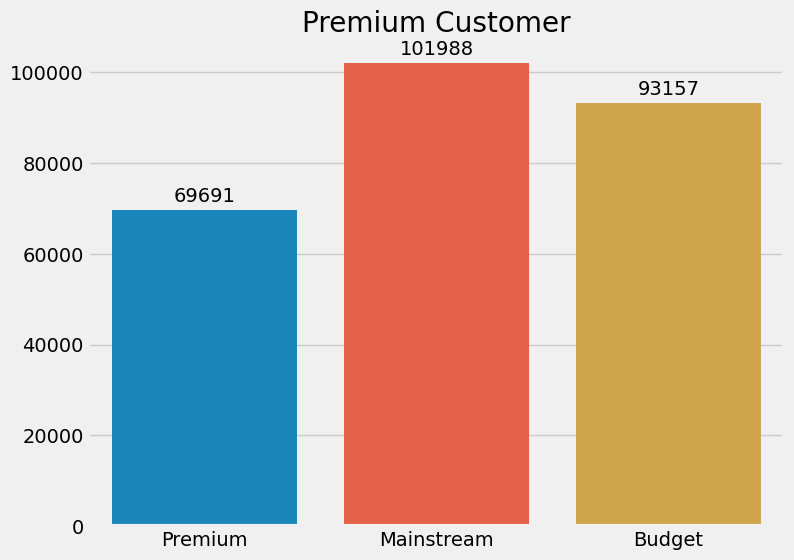

In [20]:
# How Many Customer based on Premium ?
ax, fig = plt.subplots(figsize = (8, 6))

plt.title('Premium Customer')
ax = sns.countplot(x = df['PREMIUM_CUSTOMER'])
ax.set_xlabel('')
ax.set_ylabel('')

add_values(ax)
plt.show()

**Insights**
- Customer who buy premium membership reach 69,691 people or ~26 % of total customer who buy chips
- There is 101,988 people who haven't buy membership or ~ 38 % of total customer who buy chips

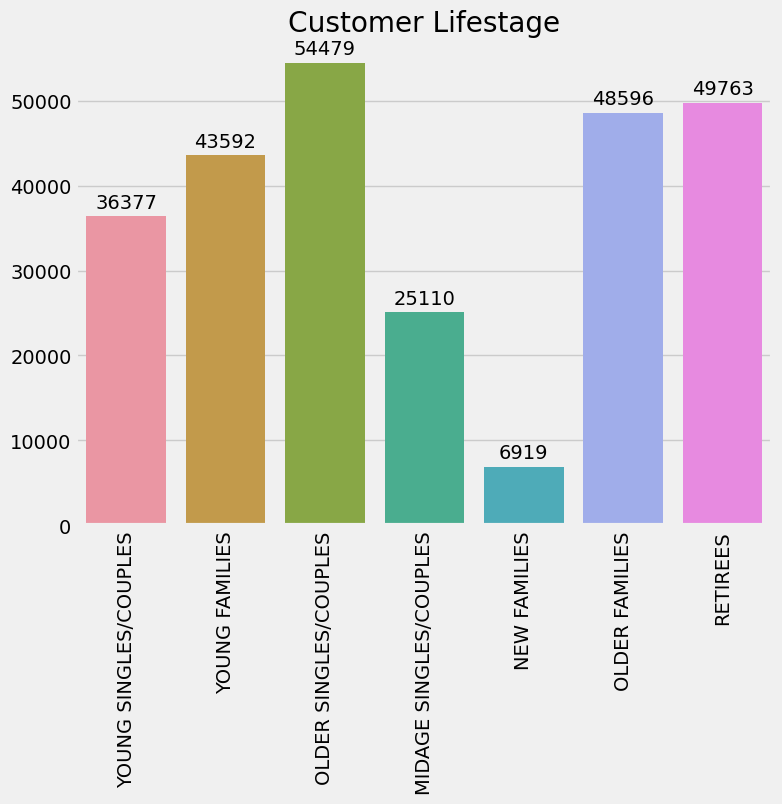

In [21]:
# How Many Customer based on Premium ?
ax, fig = plt.subplots(figsize = (8, 6))

ax = sns.countplot(x=df['LIFESTAGE'])

plt.title('Customer Lifestage')
for label in ax.get_xticklabels():
    label.set_rotation(90)

ax.set_xlabel('')
ax.set_ylabel('')
add_values(ax)

plt.show()

**Insights** 
- Customer who buy chips mainly came from Older Single / Couples (~20%) and Retirees (~18%)
- People who buy chips because they have many free time or in this case elder

In [22]:
# Make sure number of Product and Product Name has same number of unique values. It means there is no mispelled product name

# len(df['PROD_NAME'].unique())
# len(df['PROD_NBR'].unique())

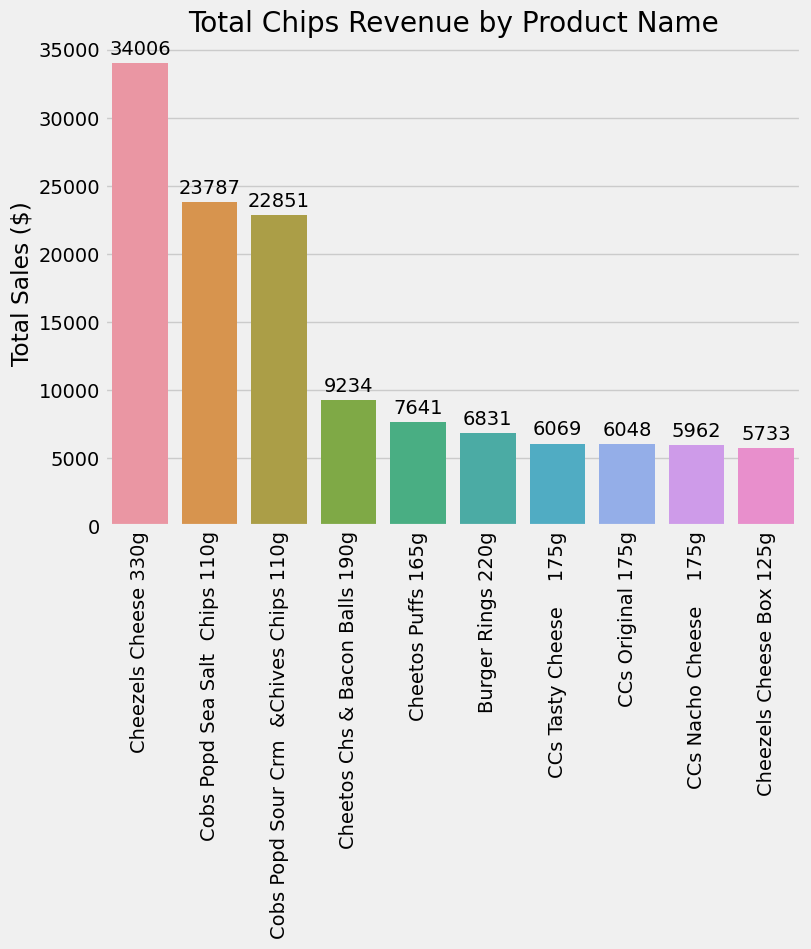

In [23]:
# Which product has highest total sales 
ax, fig = plt.subplots(figsize = (8, 6))

product_sales = df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
top_product_sales = product_sales[0:10].sort_values(by = 'TOT_SALES', ascending=False)

# Create a bar plot
ax = sns.barplot(x='PROD_NAME', y='TOT_SALES', data=top_product_sales)

plt.title('Total Chips Revenue by Product Name')

for label in ax.get_xticklabels():
    label.set_rotation(90)
ax.set_xlabel('')
ax.set_ylabel('Total Sales ($)')
add_values(ax)

plt.show()

**Insights**
- Cheezels Cheese 330 g has highest revenue with $34,006 
- From top 10 product, 4 has cheesy flavour, it shows that many people like cheese for chips flavour

In [24]:
# Which Customer Group based on Premium has highest number pf sales ? 
premium_sales = df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()
premium_sales.sort_values(by = 'TOT_SALES', ascending=False)

,PREMIUM_CUSTOMER,TOT_SALES
1,Mainstream,748089.05
0,Budget,673569.40
2,Premium,504375.70


**Insights**
- Highest revenue come Customer who don't buy membership. Because the number of main stream customer larger than other customer 
- People who buy premium membership have relatively high revenue if compared to number of them. Shows potential increasing revenue if people who buy membership increasing

In [25]:
# Which Customer Group Based on Life Stage has hignest number of sales
lifestage_sales = df.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()
lifestage_sales.sort_values(by = 'TOT_SALES', ascending=False)

,LIFESTAGE,TOT_SALES
3,OLDER SINGLES/COUPLES,400866.55
4,RETIREES,365270.65
2,OLDER FAMILIES,350907.25
5,YOUNG FAMILIES,314896.05
6,YOUNG SINGLES/COUPLES,259754.40
0,MIDAGE SINGLES/COUPLES,184019.55
1,NEW FAMILIES,50319.70


**Insights** 
- Older Single Couples and Retirees both were have highest revenue 

## Recommendation

- Create marketing program that spread message about how chips could become a good friend when relaxing / chilling. So it can targetted elderly and young customer at the same time
- Cheese flavour become the most favorite flavour of chips. There is need another innovation idea from the cheese flavour so attract more interest of customer who like cheese or customer who don't
- Attract other people to become a member by adding another benefits that suited with elderly customer